In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-rec/sample_submission.csv
/kaggle/input/digit-rec/train.csv
/kaggle/input/digit-rec/test.csv


In [5]:
train = pd.read_csv('../input/digit-rec/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv('../input/digit-rec/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)  # Cant you just do train.drop(['label'], axis=1) ??

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

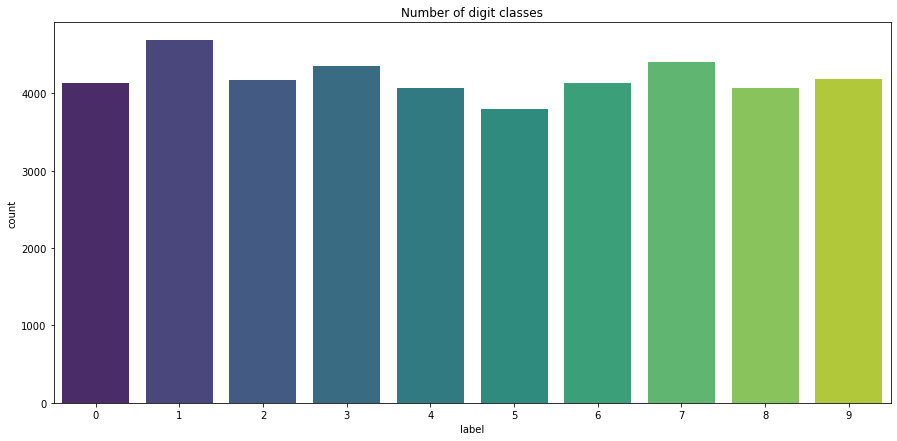

In [12]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="viridis")
plt.title("Number of digit classes")
Y_train.value_counts()

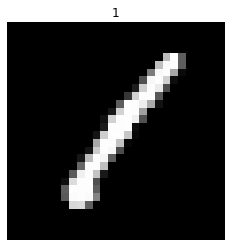

In [17]:
img = X_train.iloc[0].to_numpy() # Switched .as_matrix() due to being deprecated since v0.23.0
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

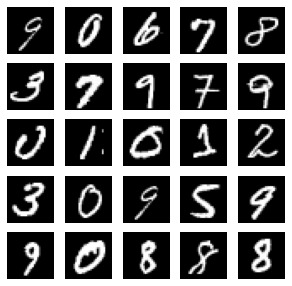

In [52]:
# sample 25 digits from train
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = Y_train[indexes]


# plot 25 digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Now isnt this plotting cool? Google is neat

In [19]:
# Normalizing! This converts everything to grayscale which makes for faster training and higher acc
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [20]:
# Converting to Tensor (-_-) #WeShouldntHaveToDoThisWithTensorFlowIts2021
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [21]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# Converts answer to a vector computer can learn from 
Y_train = to_categorical(Y_train, num_classes = 10)

In [22]:
from sklearn.model_selection import train_test_split
# Splits data so we have an acc read (Just good practice)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


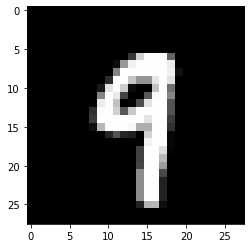

In [26]:
# Give me an image matplotlib
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [27]:
# Library mumbo-jumbo
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Create your Neural Network (Doesnt that sound super fancy)
model = Sequential()
# Create your layers 
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [28]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [53]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Visualize model somewhat so its easier to understand
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [30]:
epochs = 10  # More Epochs = Higher Acc (Better chance to overfit or no?)
batch_size = 250 # Helps determine iteration count and back-front sweeps

In [31]:
# data augmentation - Helps with generalization
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [32]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
          epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 20s 126ms/step - loss: 1.5451 - accuracy: 0.4722 - val_loss: 0.1910 - val_accuracy: 0.9460
Epoch 2/10
151/151 [==============================] - 19s 123ms/step - loss: 0.4490 - accuracy: 0.8552 - val_loss: 0.1233 - val_accuracy: 0.9662
Epoch 3/10
151/151 [==============================] - 19s 125ms/step - loss: 0.3258 - accuracy: 0.8970 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 4/10
151/151 [==============================] - 19s 122ms/step - loss: 0.2633 - accuracy: 0.9162 - val_loss: 0.0805 - val_accuracy: 0.9738
Epoch 5/10
151/151 [==============================] - 19s 124ms/step - loss: 0.2298 - accuracy: 0.9274 - val_loss: 0.0729 - val_accuracy: 0.9790
Epoch 6/10
151/151 [==============================] - 19s 125ms/step - loss: 0.2126 - accuracy: 0.9325 - val_loss: 0.0662 - val_accuracy: 0.9793
Epoch 7/10
151/151 [==============================] - 19s 123ms/step - loss: 0.1991 - accuracy: 0.9398 - val_loss: 0.0611 - val_ac

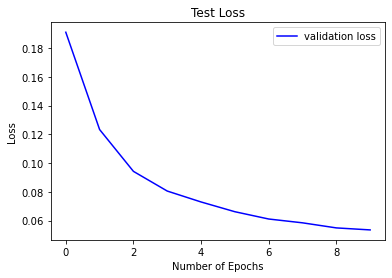

In [33]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

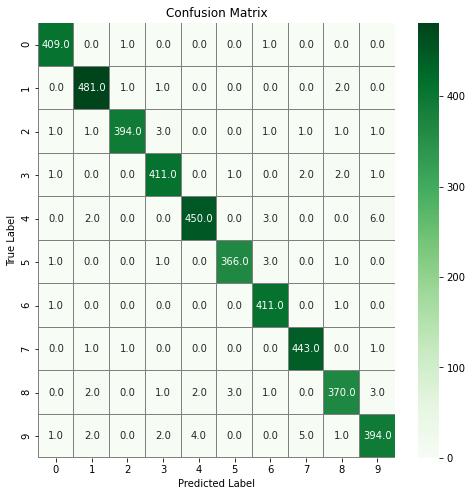

In [34]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# WHAT IF WE CHANGED THE DATA AUG FOR MORE GENERALIZATION??? WILL IT EVEN WORK??

In [41]:
# data augmentation - Helps with generalization
datagen2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen2.fit(X_train)

In [42]:
history2 = model.fit_generator(datagen2.flow(X_train,Y_train, batch_size=batch_size),
          epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 19s 126ms/step - loss: 1.4697 - accuracy: 0.4772 - val_loss: 0.6704 - val_accuracy: 0.8548
Epoch 2/10
151/151 [==============================] - 19s 123ms/step - loss: 1.1357 - accuracy: 0.5979 - val_loss: 0.4898 - val_accuracy: 0.8731
Epoch 3/10
151/151 [==============================] - 19s 126ms/step - loss: 0.9845 - accuracy: 0.6564 - val_loss: 0.4263 - val_accuracy: 0.8938
Epoch 4/10
151/151 [==============================] - 19s 125ms/step - loss: 0.9118 - accuracy: 0.6860 - val_loss: 0.3938 - val_accuracy: 0.8919
Epoch 5/10
151/151 [==============================] - 19s 124ms/step - loss: 0.8433 - accuracy: 0.7079 - val_loss: 0.3398 - val_accuracy: 0.9026
Epoch 6/10
151/151 [==============================] - 19s 125ms/step - loss: 0.7927 - accuracy: 0.7334 - val_loss: 0.3058 - val_accuracy: 0.9100
Epoch 7/10
151/151 [==============================] - 19s 124ms/step - loss: 0.7467 - accuracy: 0.7492 - val_loss: 0.3113 - val_ac

In [ ]:
# Notes
# Took alot longer to train! Why do you guys think that is?
# What values did I change to make it train slower? 
# How did changing those values make it slower?
# What did you notice about the val_acc? Do you think these changes will help or hurt generalization?

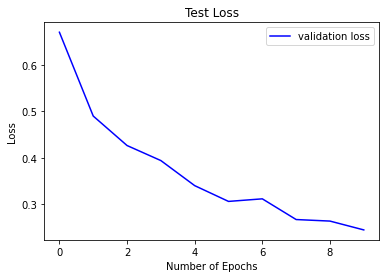

In [45]:
plt.plot(history2.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

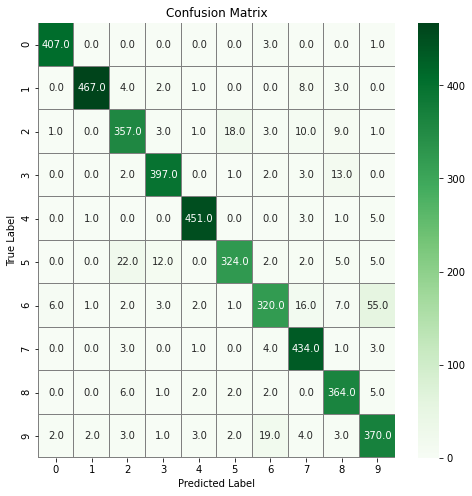

In [46]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# LOOK AT THAT!! (9,5) and the matrix down the line.
# Its not a solid green down the middle and the program confused alot of 6s with 9s. Interesting. Why do you think that is? (Look back to our changes in Data Aug)

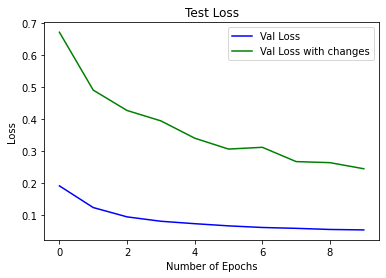

In [49]:
# Superimposing graphs to see what did better
plt.plot(history.history['val_loss'], color='b', label="Val Loss")
plt.plot(history2.history['val_loss'], color='g', label="Val Loss with changes")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

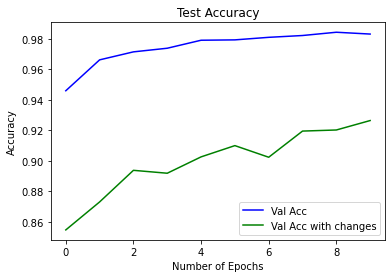

In [50]:
# Superimposing graphs to see what did better
plt.plot(history.history['val_accuracy'], color='b', label="Val Acc")
plt.plot(history2.history['val_accuracy'], color='g', label="Val Acc with changes")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Congrats on making it this far, email me at JordanMooreNav@gmail.com if you have any questions
# Mentors please copy this notebook and insert your contact info there! 
# If your cohort asks any questions, send them to me (before or after you answer them) because they help me learn!!
# Thanks yall